# Autostopem przez statystykę

## Odcinek I: To (nie)istotne statystycznie

Work In Progress

# Motywacja - testy A/B

Każdy test A/B oznacza zmierzenie wybranego wskaźnika - np. CTR (click through rate). CTR to konwersja kliknięć, czyli ile razy na liczbę odłosn dany wariant został kliknięty.

Interesuje nas porównanie, czy to do "oczekiwanego wyniku" czy też pomiędzy różnymi wariantami, które równolegle prezentujemy.


## CTR a rzut monetą
Równie dobrze możemy mówić o rzutach monetą - ile razy został wyrzucony orzeł vs ile razy oferta została kliknięta.

# Analiza statystyczna

Analizując dane zawsze mamy:

1. Parametry: opisują nasze dane, nie znamy ich a chcielibyśmy się o nich więcej nauczyć, móc je porównać, poznać.
1. Dane: liczby które, powiedzą nam więcej o parametrach
1. Model(e): narzędzie które pozwoli nam poznać (1) za pomocą (2)

Dwie szkoły, które odwiedzimy: Statystyka Fisher'a oraz Bayes'a.

## Fisher
![Fisher](R._A._Fischer.jpg)

1. Dane są losowe. To co zaobserwowaliśmy (dane) jest wynikiem doświadczenia losowego. Gdy powtórzymy doświadczenie, wynik może się różnić.
1. Parametry modelu są stałe. Nie znamy ich, niemniej mają jedną ściśle określoną wartość.

### Model
### $$f(y | \theta)$$

Model f otrzymuje dane y warunkowane parametrem $\theta$

Ponieważ nie znamy wartości parametru $\theta$, musimy go oszacować. Statystyka w ujęciu częstościowym proponuje obliczenie estymatorów. Przykład:
### $$\hat{\theta} = \frac{kliki}{emisje}$$

## Bayes
![Bayes](Thomas_Bayes.gif)

1. Dane są stałe. Były losowe ale gdy je zebraliśmy stają się dla nas niezmienne
1. Parametry nie są losowe, aczkolwiek aby zamodelować naszą niepewności co do ich wartości używamy rozkładów prawdopodobieństwa i traktujemy je tak jakby były losowe. 

### Model
### $$p(\theta | y)$$

Ale o tym innym razem :)




# Podejście częstościowe: rzut monetą

![coin](coin2.jpg)

In [275]:
import pymc as pm
import numpy as np
import pandas as pd
import seaborn as sns
import scipy, scipy.stats
import pylab
from matplotlib import pyplot as plt
from pymc.Matplot import plot as mcplot
sns.set(color_codes = True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_context('notebook', font_scale=1, rc={"lines.linewidth": 1})
sns.set_style("white")
sns.set_style("ticks")
np.random.seed(1)

### Rzucamy 200 razy monetą z obciążeniem $\theta = 0.5$

Rozkład, który opisze to zdarzenie to rozkład dwumianowy (ang. binomial). Opisuje on liczbę sukcesów *k* w ciągu *N* niezależnych prób, gdzie sukces ma stałe prawdopodobieństwo *p*.

Dla rzutu monetą sprawiedliwą, możemy zdefiniować sukces jako wyrzucenie orła, a pradopodobieństwo sukcesu $p = \theta = \frac{1}{2}$. 

W tym momencie funkcja masy prawdopodobieństwa jest funkcją ilości wyrzuconych orłów, czyli podpowie ile przykładowo wynosi prawdopodobieństwo wyrzucenia 50 orłów.

Rozkład dwumianowy możemy go aproksymować rozkładem normalnym gdzie $\mu = np$ natomiast $\sigma = \sqrt{np(1 - p)}$.

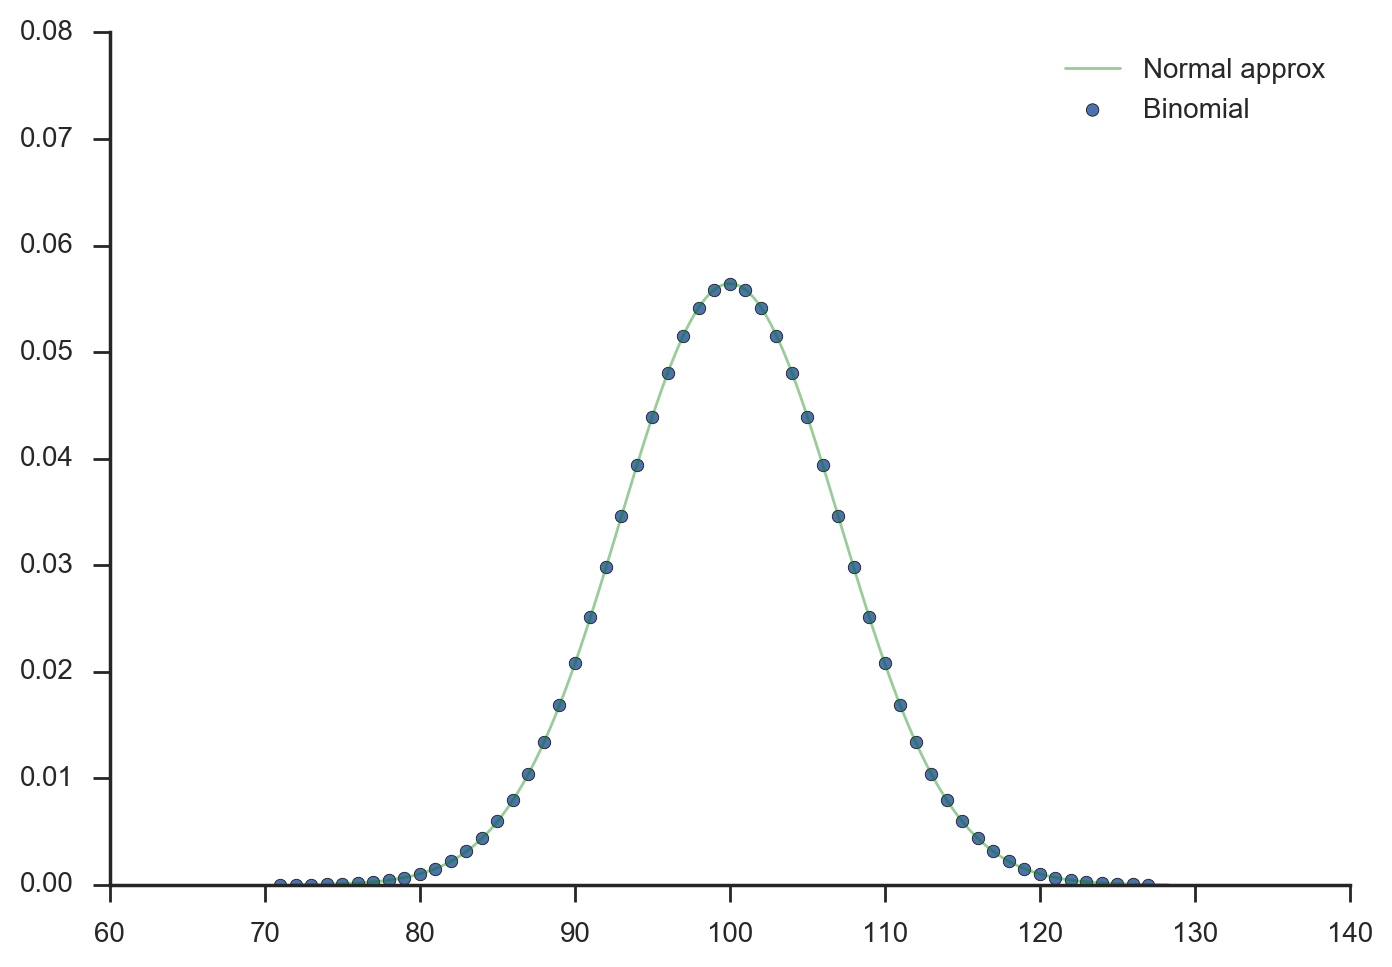

In [276]:
n = 200
p = 0.5

norm_mean = n * p
norm_sd = np.sqrt(n * p * (1 - p))
    
x_min, x_max = norm_mean - 4 * norm_sd, norm_mean + 4 * norm_sd
x_b = np.floor(np.arange(x_min, x_max, 1))
x_n = np.arange(x_min, x_max, 0.01)

binom = scipy.stats.binom.pmf(x_b, n, p)
norm = scipy.stats.norm.pdf(x_n, loc=norm_mean, scale=norm_sd)

pylab.plot(x_n, norm, label='Normal approx', color='green', alpha=0.4)
pylab.scatter(x_b, binom, label='Binomial')
plt.legend()
plt.ylim((0, 0.08))

sns.despine()

# Chcemy sprawdzić, czy nasza moneta jest sprawiedliwa

## Odrzućmy mało prawdopodobne wyniki

NHST proponuje aby się zastanowić, które dane byśmy uznali za mało pradowpodobne. Czy wyrzucenie 150 orłów w 200 rzutach w wypadku monety z parametrem $\theta = 0.5$ jest "ok"?

Załóżmy, że chcemy sprawdzić, czy moneta jest sprawiedliwa. 

Pomysł: odrzućmy mało prawdopodobne wyniki, przy założeniu, że moneta jest faktycznie sprawiedliwa. Co istotne, z definicji odrzucimy wyniki, które mogą pochodzić z rozkładu monety sprawiedliwej ale są nietypowe (np. 200 orłów w 200 rzutach).

## Poziom istotności $\alpha = 0.01$

Poziom istotności to próg przy jakim odrzucimy wyniki. Zastanówmy się, jakie wyniki byśmy odrzucili w 200 rzutach monetą, gdybyśmy chcieli odrzucić najbardziej skrajną część masy prawdopodobieństwa.

mean = 100.0, q1 = 81.7861363228, q2 = 118.213863677


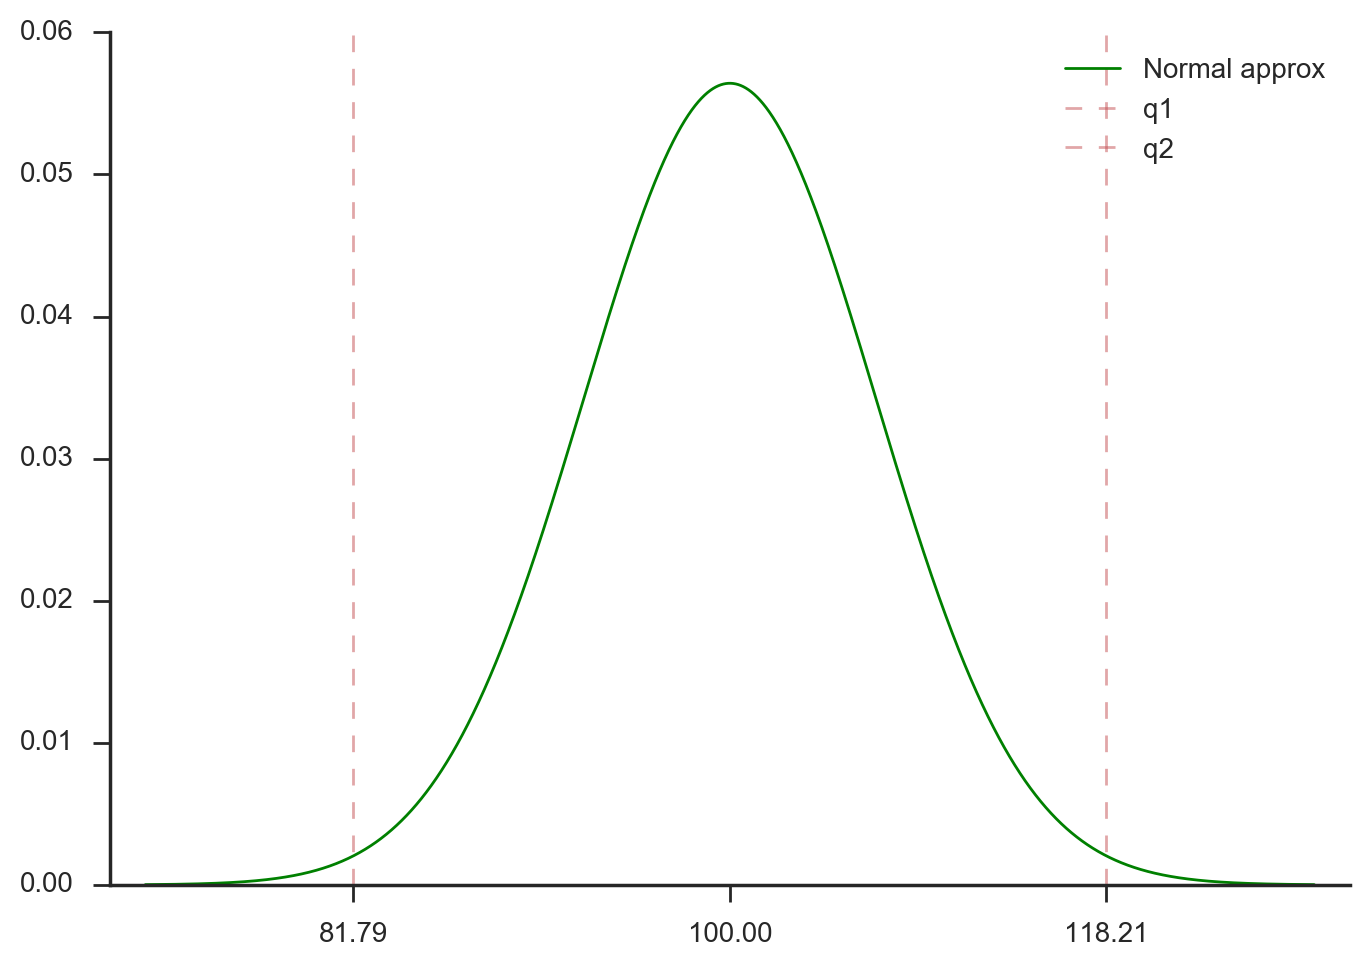

In [277]:
alpha = 0.01

norm = scipy.stats.norm.pdf(x_n, loc=norm_mean, scale=norm_sd)

q1 = scipy.stats.norm.ppf(alpha / 2, norm_mean, norm_sd)
q2 = scipy.stats.norm.ppf(1 - alpha / 2, norm_mean, norm_sd)

pylab.plot(x_n, norm, label='Normal approx', color='green')
plt.axvline(x=q1, color='r', ls='dashed', alpha=0.5, label='q1')
plt.axvline(x=q2, color='r', ls='dashed', alpha=0.5, label='q2')
plt.xticks([q1, q2, norm_mean])
plt.legend()
sns.despine()

print 'mean = {}, q1 = {}, q2 = {}'.format(norm_mean, q1, q2)
#print scipy.stats.norm.cdf(q1, norm_mean, norm_sd)
#print 1 - scipy.stats.norm.cdf(q2, norm_mean, norm_sd)

mean = 100.0, q1 = 82.0, q2 = 118.0


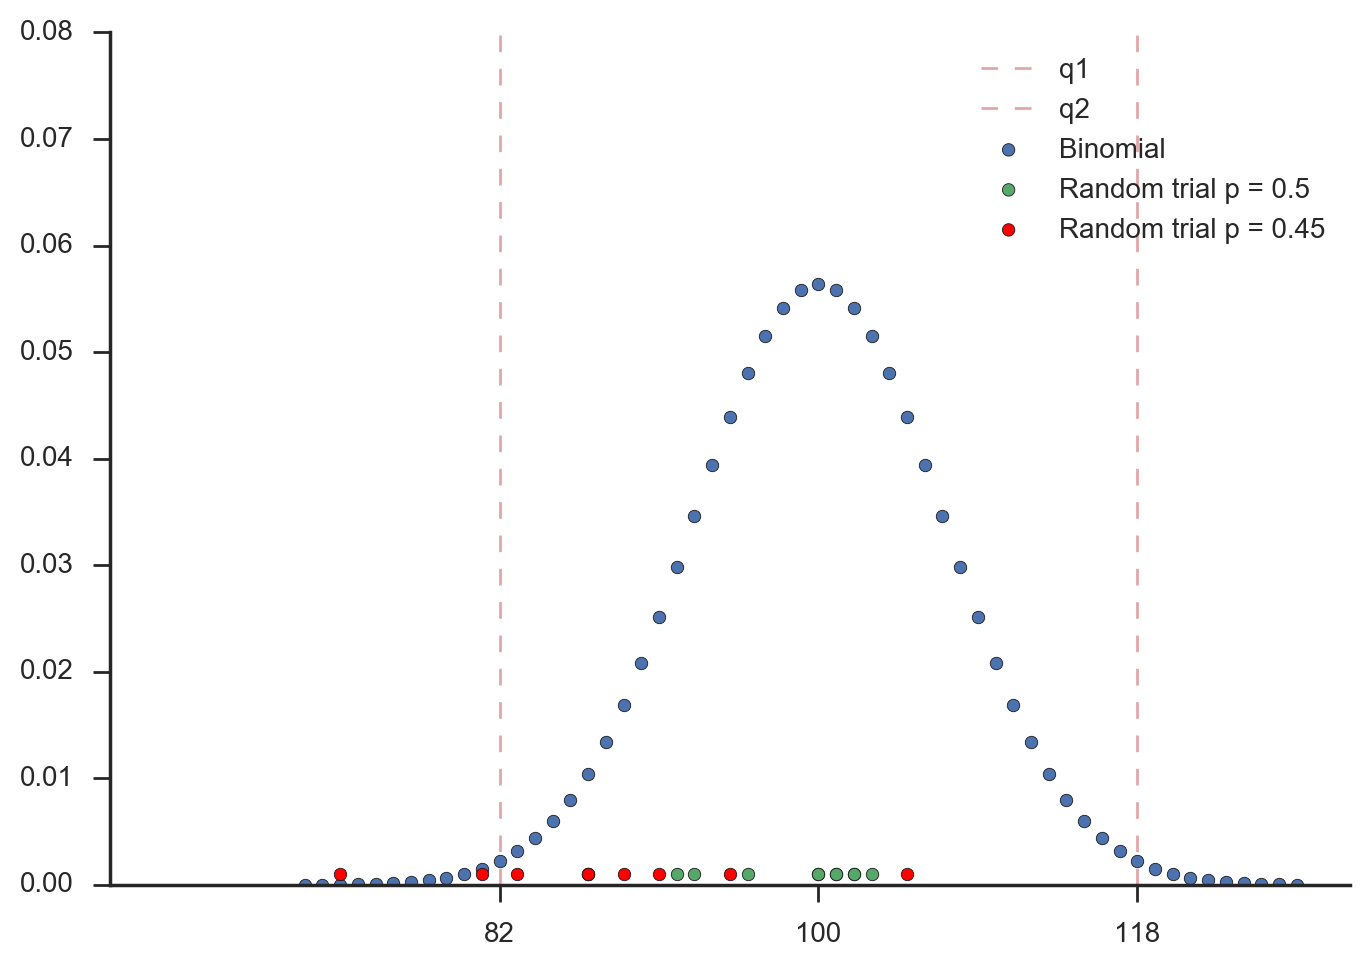

In [278]:
alpha = 0.01

norm = scipy.stats.norm.pdf(x_n, loc=norm_mean, scale=norm_sd)

q1 = scipy.stats.binom.ppf(alpha / 2, n, p)
q2 = scipy.stats.binom.ppf(1 - alpha / 2, n, p)

rands = 10
random_trial = scipy.stats.binom.rvs(n, p, size=rands)
random_trial2 = scipy.stats.binom.rvs(n, 0.45, size=rands)

pylab.scatter(x_b, binom, label='Binomial')

pylab.scatter(random_trial, np.repeat(0.001, rands), label='Random trial p = 0.5', c='g')
pylab.scatter(random_trial2, np.repeat(0.001, rands), label='Random trial p = 0.45', c='red')

plt.axvline(x=q1, color='r', ls='dashed', alpha=0.5, label='q1')
plt.axvline(x=q2, color='r', ls='dashed', alpha=0.5, label='q2')
plt.xticks([q1, q2, n * p])
plt.legend()
plt.ylim((0, 0.08))
sns.despine()

print 'mean = {}, q1 = {}, q2 = {}'.format(norm_mean, q1, q2)
#print scipy.stats.binom.cdf(q1, n, p) + 1 - scipy.stats.binom.cdf(q2, n, p)

## W poszukiwaniu p-wartości

1. ### $\Pr(X\geq x | H_0, I)$
1. ### $\Pr(X\leq x | H_0)$
1. ### $2\min\{\Pr(X\leq x | H_0),\Pr(X\geq x | H_0)\}$

p-wartość: Prawdopodobieństwo zaobserwowania danych takie jak mamy albo jeszcze bardziej "odstających" **przy założeniu**, że hipoteza zerowa jest prawdziwa.

Mała p-wartość oznacza, że hipoteza zerowa jest prawdziwa a my zaobserwowaliśmy bardzo nietypowe wyniki *albo*, że hipoteza zerowa jest fałszywa.

Z porównania p-wartości do wybranego poziomu istotności wynika, czy:
1. mamy podstawy aby odrzucić hipotezę zerową (wtedy gdy $p < alpha$) *albo* 
1. nie mamy podstawy do odrzucenia hipotezy zerowej (nie wiemy czy jest prawdziwa)

# Czy intencje były czyste? 

Rzuciliśmy 100 razy monetą i otrzymalismy 70 orłów. Wystarczy sprawdzić, jak prawdopodobny to jest wynik w odniesieniu do rozkładu... jakiego?

1. Czy rzucaliśmy 100 razy monetą, czy może:
1. Rzucaliśmy aż do 70tego sukcesu, czy:
1. Rzucaliśmy przez 5 minut?
1. ... 

Odpowiedź na to pytanie ma znaczenie, spójrzmy na trzy rozkłady:

1. Binomial
1. Negative binomial
1. Poisson
1. ...



0.0795892373872
0.0397946186936
0.0563250063252


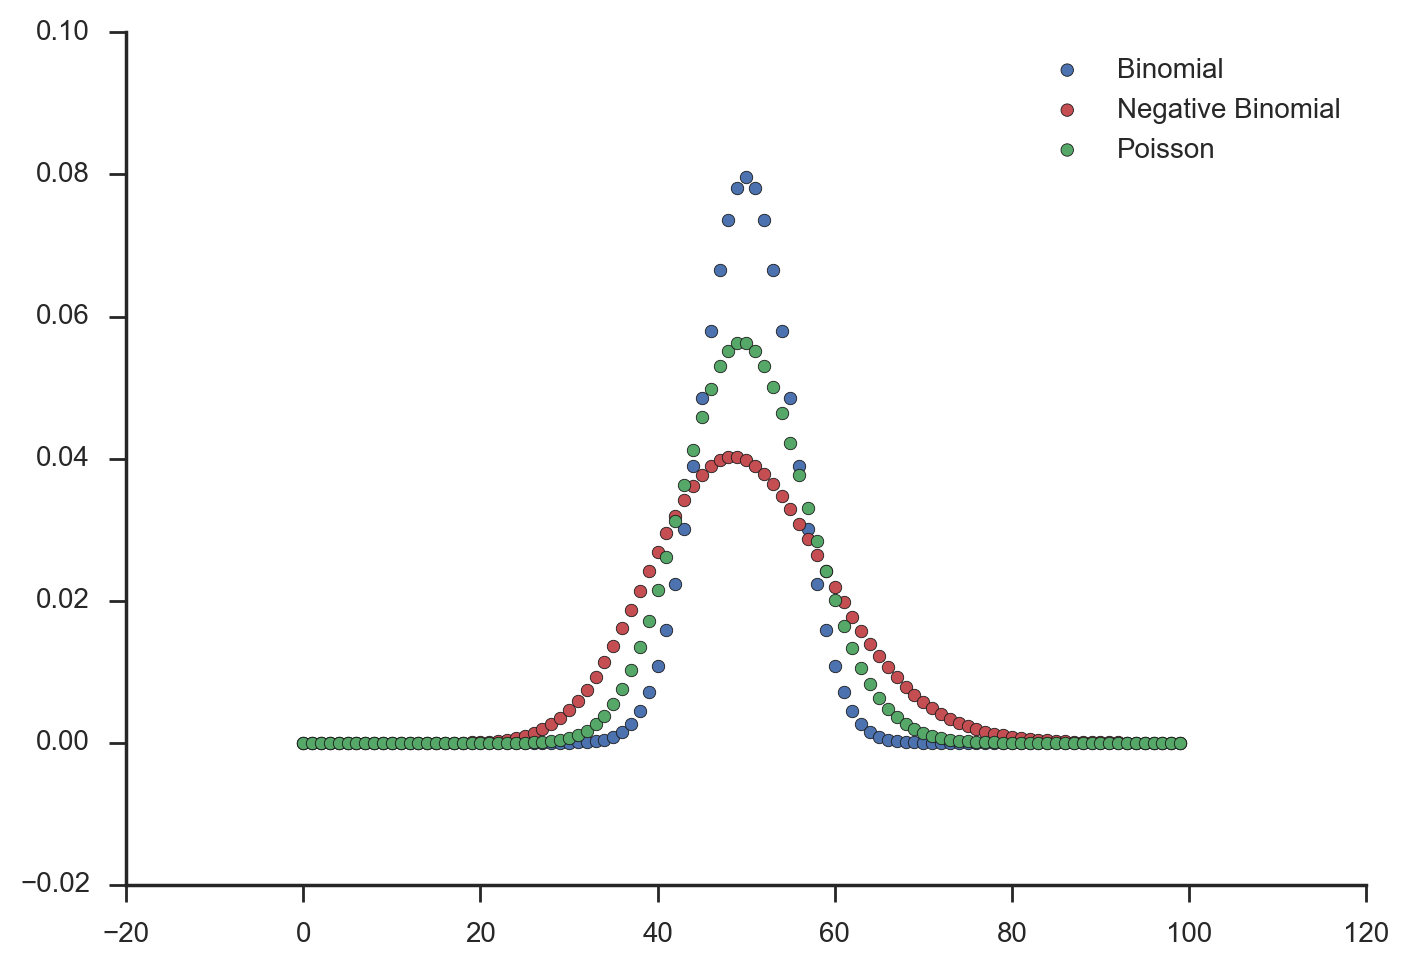

In [279]:
n = 100
succ = 50.
p = 0.5

x_min, x_max = 0, 100
x_b = np.floor(np.arange(x_min, x_max, 1))
x_n = np.arange(x_min, x_max, 0.01)

binom = scipy.stats.binom.pmf(x_b, n, p)
nbinom = scipy.stats.nbinom.pmf(x_b, succ, p)
pois = scipy.stats.poisson.pmf(x_b, succ)

pylab.scatter(x_b, binom, label = 'Binomial')
pylab.scatter(x_b, nbinom, label = 'Negative Binomial', c = 'r')
pylab.scatter(x_b, pois, label = 'Poisson', c = 'g')

plt.legend()
sns.despine()

print scipy.stats.binom.pmf(succ, n, p)
print scipy.stats.nbinom.pmf(succ, succ, p)
print scipy.stats.poisson.pmf(succ, succ)

# Rzućmy 1000 razy sprawiedliwą monetą po 100 razy

Policzymy p-wartości z testu, gdzie
### $H_0: \theta = 0.5$
### $H_1: \theta \neq 0.5$

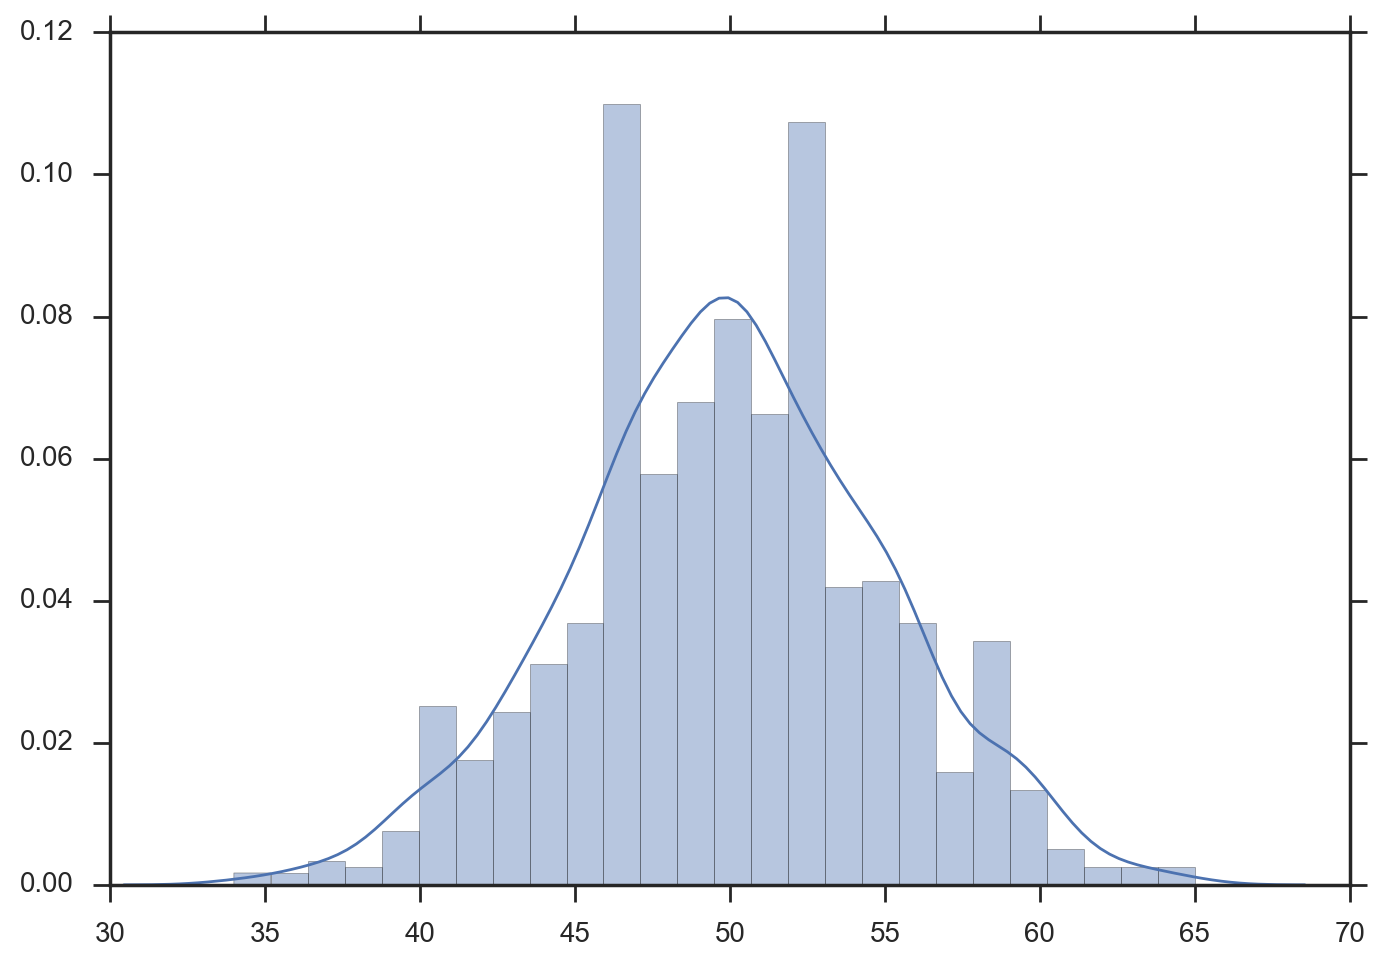

In [280]:
binom = scipy.stats.binom.rvs(n=100, p=0.5, size=1000)
sns.distplot(binom)

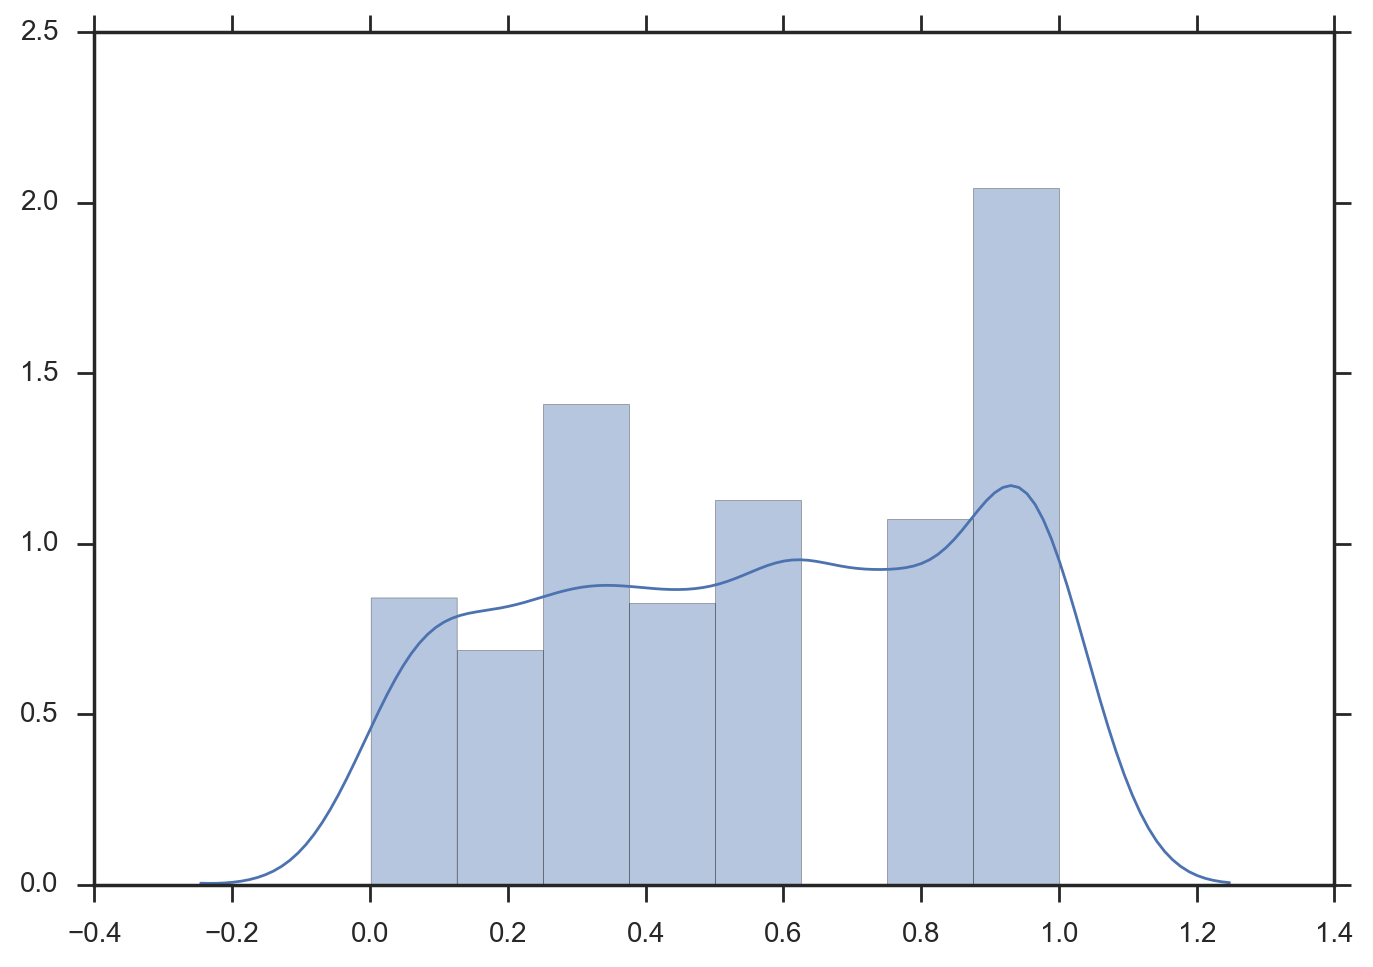

In [281]:
pvals = [scipy.stats.binom_test(b, n = 100, p = 0.5) for b in binom]
sns.distplot(pvals)

In [282]:
print len(np.where(np.array(pvals) < 0.01)[0])
print len(np.where(np.array(pvals) < 0.05)[0])

7
35


## Przedziały ufności


TBC